<a href="https://colab.research.google.com/github/sarveshsuresh/Melanoma_Tumor_Size_Prediction/blob/master/tumor_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##IMPORT THE NECESSARY PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#READ THE TRAIN AND TEST DATA
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

GET A FEEL OF THE DATA BEFORE DIVING INTO ML ALGORITHMS

In [3]:
train.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [4]:
test.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,4946.44,914.06,0.18479,54.5566,6.628345e+05,67.0525,2301.76,22,41.9554
1,5613.85,1629.12,0.29019,51.5524,7.842271e+05,80.1986,3235.00,48,40.7410
2,12421.10,3062.41,0.24654,154.1560,1.763575e+06,186.8590,4684.63,63,29.4778
3,6830.77,2457.66,0.35979,56.8995,9.296623e+05,92.7361,3211.93,42,38.5027
4,33407.80,12353.60,0.36978,219.0740,4.595871e+06,493.3370,13389.36,187,26.8449


In [5]:
train.shape

(9146, 10)

In [6]:
test.shape

(36584, 9)

In [7]:
train.dtypes

mass_npea         float64
size_npear        float64
malign_ratio      float64
damage_size       float64
exposed_area      float64
std_dev_malign    float64
err_malign        float64
malign_penalty      int64
damage_ratio      float64
tumor_size        float64
dtype: object

In [8]:
test.dtypes

mass_npea         float64
size_npear        float64
malign_ratio      float64
damage_size       float64
exposed_area      float64
std_dev_malign    float64
err_malign        float64
malign_penalty      int64
damage_ratio      float64
dtype: object

In [ ]:
#CHECK IF NEW FEATURES CAN BE ENGINEERED 

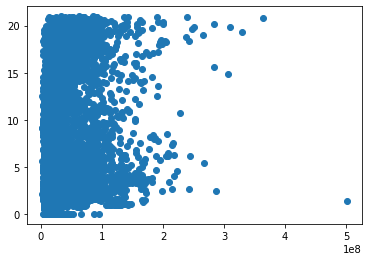

In [9]:
plt.scatter((train["mass_npea"])*(train['size_npear']),train['tumor_size'])

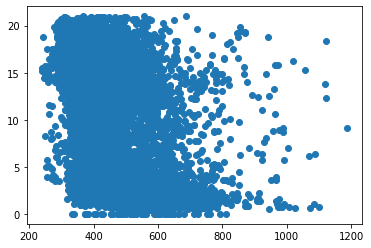

In [10]:
plt.scatter(train['exposed_area']/train['size_npear'],train['tumor_size'])

In [ ]:
#WE DO NOT ADDITIONAL FEATURES AS THE PLOTS DO NOT ENCOURAGE US TO

In [11]:
!pip install catboost

     |████████████████████████████████| 65.9MB 54kB/s 


In [12]:
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [14]:
x=train.drop(columns=['tumor_size'])
y=train['tumor_size']

In [15]:
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=27), []
Actual_Preds=[]

for trainn, testt in kfold.split(x):
        x_train, x_test = x.iloc[trainn], x.iloc[testt]
        y_train, y_test = y.iloc[trainn], y.iloc[testt]
        
        model = CatBoostRegressor(num_trees=2000,learning_rate=0.05,od_type="Iter",od_wait=200
                                  )
        model.fit(x_train,y_train)

        preds =model.predict(x_test)
        score = mean_squared_error(y_test, preds)**(1/2)
        scores.append(score)
        realpreds = model.predict(test)
        Actual_Preds.append(realpreds)
        
        print(score)
print("AVERAGE SCORE: ", sum(scores)/len(scores))

Streaming output truncated to the last 5000 lines.
1005:	learn: 3.1182303	total: 4.73s	remaining: 4.67s
1006:	learn: 3.1169147	total: 4.73s	remaining: 4.67s
1007:	learn: 3.1166739	total: 4.74s	remaining: 4.66s
1008:	learn: 3.1159741	total: 4.74s	remaining: 4.66s
1009:	learn: 3.1158254	total: 4.75s	remaining: 4.65s
1010:	learn: 3.1152624	total: 4.75s	remaining: 4.65s
1011:	learn: 3.1142094	total: 4.76s	remaining: 4.64s
1012:	learn: 3.1135695	total: 4.76s	remaining: 4.64s
1013:	learn: 3.1127075	total: 4.77s	remaining: 4.63s
1014:	learn: 3.1118933	total: 4.77s	remaining: 4.63s
1015:	learn: 3.1112070	total: 4.78s	remaining: 4.63s
1016:	learn: 3.1101339	total: 4.78s	remaining: 4.62s
1017:	learn: 3.1087116	total: 4.79s	remaining: 4.62s
1018:	learn: 3.1070812	total: 4.79s	remaining: 4.61s
1019:	learn: 3.1065353	total: 4.79s	remaining: 4.61s
1020:	learn: 3.1051502	total: 4.8s	remaining: 4.6s
1021:	learn: 3.1031332	total: 4.8s	remaining: 4.6s
1022:	learn: 3.1027274	total: 4.81s	remaining: 4.59s

In [ ]:
##AFTER SEVERAL TRIALS, CATBOOST as a Standalone without blending with other models was found to give the best performance .


In [ ]:
preds = np.mean(Actual_Preds,0)
liv= pd.DataFrame(preds,columns=["tumor_size"])


In [ ]:
liv['tumor_size']=model.predict(test)

In [ ]:
liv['tumor_size'].to_csv("predictions.csv",index=False)